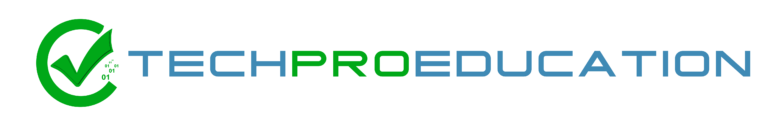

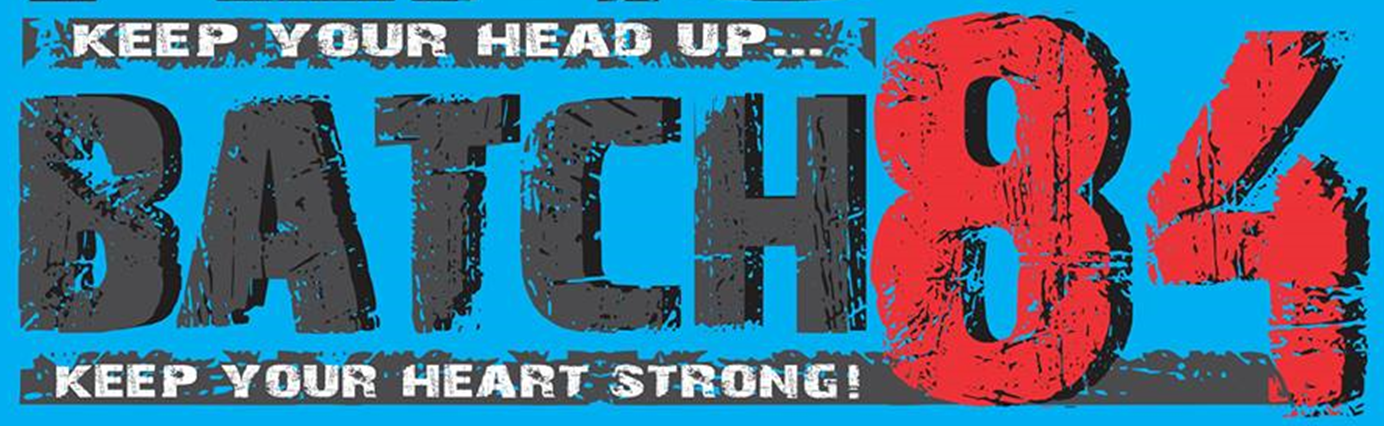

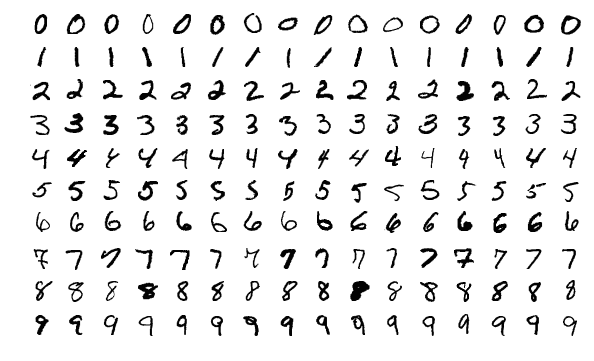

In this notebook, we are going to dive into the MNIST (Modified National Institute of Standards and Technology) database. It can be said that the MNIST handprinted character image dataset is the “Hello World” implementation for machine learning, and the dataset is used as a worldwide machine learning benchmark. It is an extremely good database for people who want to try machine learning techniques and pattern recognition methods on real-world data while spending minimal time and effort on data preprocessing and formatting. Its simplicity and ease of use are what make this dataset so widely used and deeply understood. Therefore, the goal of this tutorial is to show you how this dataset can be used in a digits recognition example using Convolutional Neural Network (CNN), which achieves a high classification accuracy on the test dataset. On a larger perspective, we will emphasize on MNIST’s importance and impact in the world of machine learning.

MNIST is a large database of small, square 28x28 pixel grayscale images of handwritten single digits between 0 and 9. It consists of a total of 70,000 handwritten images of digits, with the training set having 60,000 images and the test set having 10,000. All images are labeled with the respective digit that they represent. There are a total of 10 classes of digits (from 0 to 9).

Our task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively using a CNN that will be able to recognize the handwritten digits. CNN is a type of deep neural network commonly used for computer vision applications. So we will build an image classifier TensorFlow’s Keras API on the MNIST dataset. Keras is a Python library and is highly recommended for beginners due to its smooth learning curve. It is very commonly used in implementing neural networks. 

In [81]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [ ]:
# MNIST, em-nist olarak geciyor, 1998 yilinda el yazisi rakamlari olusturup, makinanin bilmesini istemisler SVM ile
# bu DL nin hello World'ü gibi,
# sonra CNN de denenmis,
# toplamda 60bin el yazisi sayi var,
# 28x28 lik data 
# 

In [82]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

In [83]:
(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

#yüklü veri seti olduug icin,

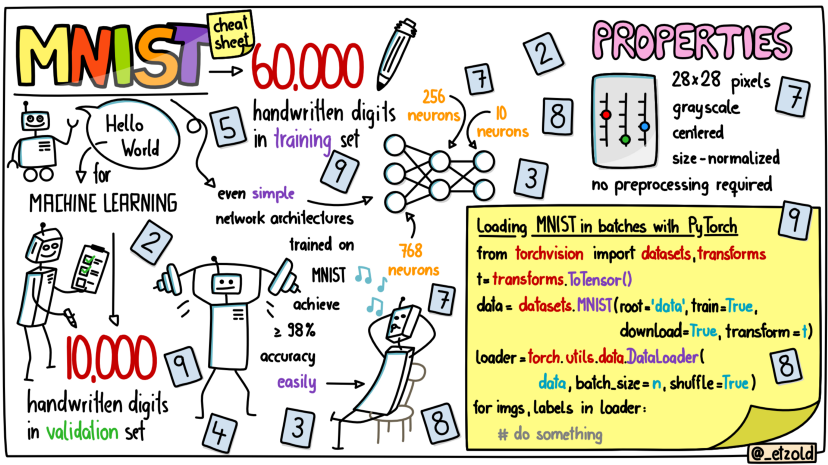

In [84]:
print(X_train.shape, y_train.shape)

# train sataasinda (60000, 28, 28) (60000,)  
# 60bin tane 28x28 lik fotolarin oldugu
# y_train normalde 0dan 9 a kadar olmasi gerkiyordu,60bin tane sayi var

(60000, 28, 28) (60000,)


In [85]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [86]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [87]:
# Checking the shape of one image
X_train[8].shape

(28, 28)

In [88]:
X_train[777]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  10,  59, 156, 239, 254, 254, 254, 255, 246, 109,   0,   0,
          0,   0],
       [  

In [89]:
X_train[777].shape

(28, 28)

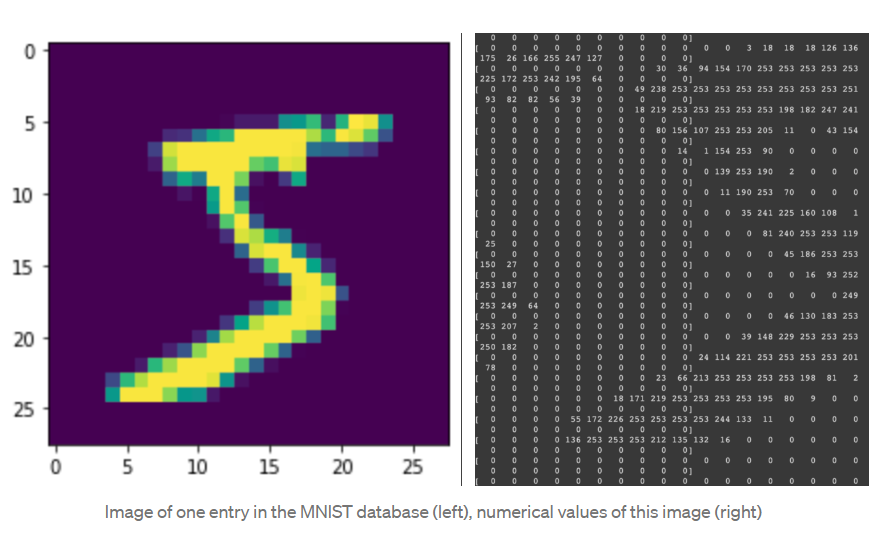

In [90]:
c

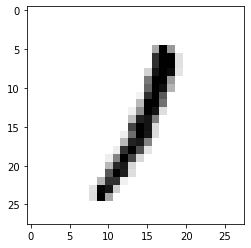

In [91]:
plt.imshow(X_train[99], cmap= plt.cm.binary)  #cm.binary bu resmin gercek rengini veriyor,
#bu deger olmayinca bilgisayar kendisi asagiyadaki gibi yapiyor

#bir veriyi görsellestirmek icin

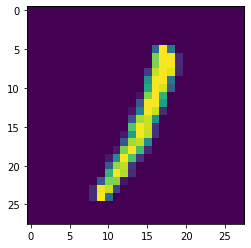

In [92]:
plt.imshow(X_train[99])

In [93]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [94]:
y_train

#burda da 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

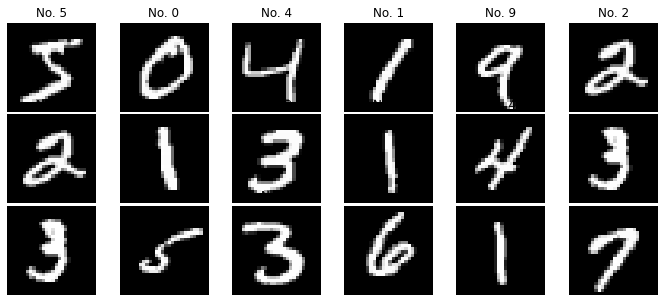

In [95]:
num_rows, num_cols = 3, 6       # Datadan 3 tane row, 6 tane column sectik.
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

#bu kod blogu ile alttaki ciktiyi almaya calisiyoruz, kac foto olacagi ,aralarindaki bosluklar tarzi


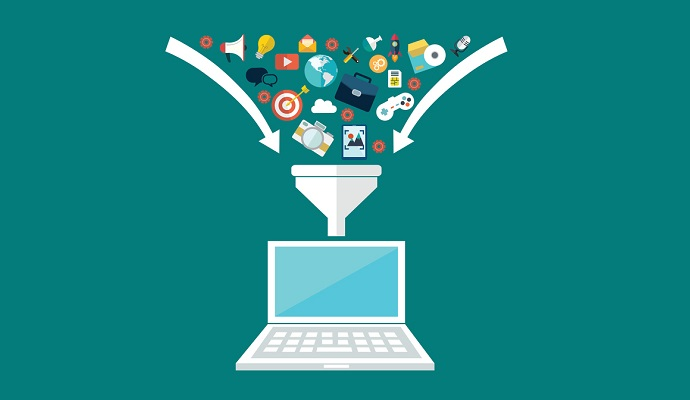

## Data Preprocessing

In [96]:
X_train[9].min()

0

In [97]:
X_train[9].max()

255

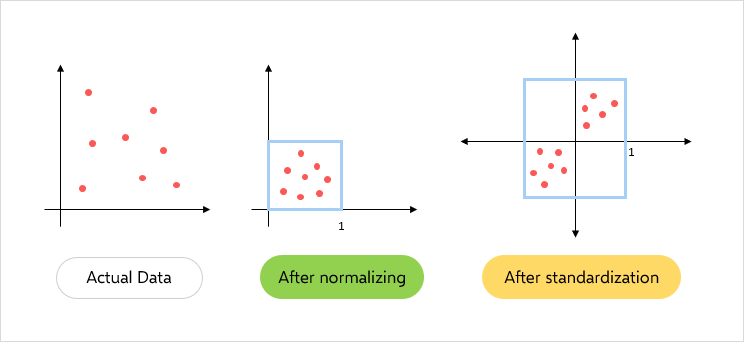

In [98]:
X_train = X_train.astype('float32')  #float olarak alalim dedik
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# 255 tane renk araligi var, bunu 255'e bölerek scaling yapiyoruz
# daha basarili sonuclar aliyoruz

In [99]:
X_train[777]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [100]:
X_train[9].min()

0.0

In [101]:
X_train[9].max()

1.0

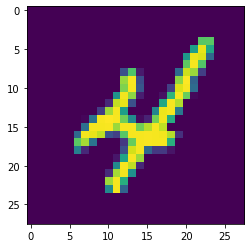

In [102]:
plt.imshow(X_train[9])

# scaling yapincada sayinin bilgisayar gözünde bir degisiklik olmadi, belli bir oran dahilinde yapiyor cünkü

In [103]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) # CNN tarafinda girmesi icin yanina bir boyut daha eklemek gerkiyor, buda siyah beyaz oldugunu gösteriyor
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)  #reshape shape'in nasil olacagini belirliyor, X_test.shape[0]=bu zaen 6000 demek ,yanina da 28,28,1 yaziyoruz,aslinda boyut ekliyor 

In [104]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [105]:
y_train
# bu haliyle soksak, bunu bir regression problemi gibi algilayabilirdi

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [106]:
X_train[777].shape

(28, 28, 1)

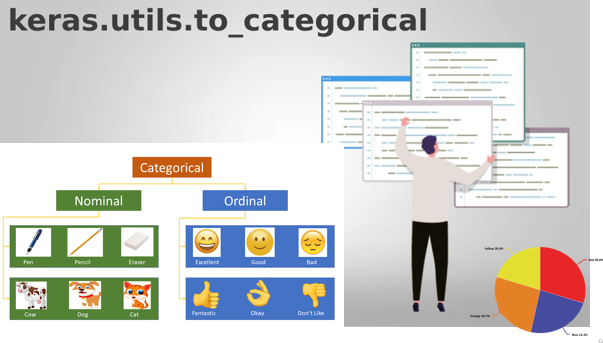

In [107]:
from tensorflow.keras.utils import to_categorical

In [108]:
Y_train = to_categorical(y_train, 10) #10 output olarak cikit alacagiz
Y_test = to_categorical(y_test, 10)
Y_test.shape

#to categorical fonksiyonu hem label encoder yapiyor hemde get dummies yapiyor
#eger yapmazsak bunu regression gibi algilayabilir, halbuki bu sayilar kedi, küpek gibi farkli kategoriler
# ve bu sayade 1.3 gibi virgüllü sayilar cikmayacak
# bu integer sayilari obje haline getiriyoruz

#bu categorical bize burda 10 tane output yapiyor
#softmax te birden fazla output oluyordu



(10000, 10)

In [110]:
Y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

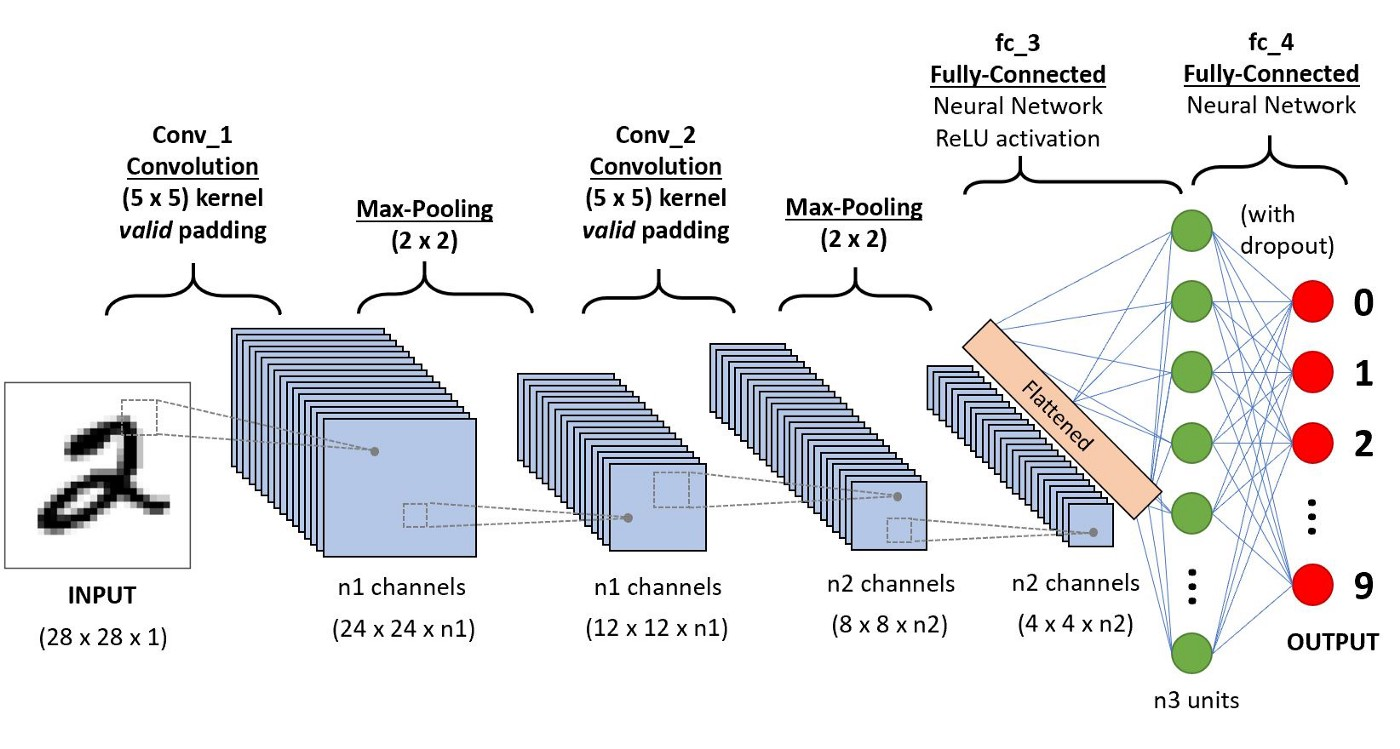

In [111]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten 
#Dense layerlerin arka arkaya gelmesi
# Maxpooling , Conv2D bu görüntü ve video' islemede kullaniyor,
# fotoyu layermelara ayirinca iki boyutlu oldugu icin 2D ordan geliyor olabilir, belkide array seklinde "D seklinde ayarlaniyor"
# yazilarda 1D olabilir, yazilarda noktalarin birlesiminde oluyor diye bir yorum yaoildi ama emin degilim



In [112]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu')) 
 # sayisini sen belirleyebilirsin,her filtre resmin farkli bir yönüne odaklaniyor
 # kernel_size bunu secmek zorundayiz
 # CNN reluyu sever, eksi degerler sifir oluyor,yani filte isleminden sonra cikan eksili degerler sifir oluyor,yani siyah renk oluyor
 
model.add(MaxPool2D(pool_size=(2, 2)))   #öznitelikler degismiyor, ama boyut azaliyor, 4 mateis kutusundan en büyügü aliniyor

model.add(Flatten())  #en son asama tek bir sira halina gelmesi, her zaman en sonda bir flatten olmasi gerekir,bunlar bizim inputlarimiz oluyor

model.add(Dense(128, activation='relu'))   #burda flatten mesajindan sonra ANN basliyor, input_shape diye bisey yazmiyoruz, zaten flattenda belli

model.add(Dense(10, activation='softmax'))  #bu hidden layer degil,cünkü softmax son katmanda oluyordu, ve 10 output var, 10 tane rakam bilmesi gerekiyor

model.compile(loss='categorical_crossentropy', #softmaxte crossentropy kullaniyliyor, tepeden inerken en dip noktayi en iyi bulan methoddur simdiye kadar
              optimizer='adam',
              metrics=['accuracy'])
              #compile hangi kurallara göre islem yapacagini belirliyoruz
              #

In [113]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
#burda 693,962 tane parametre devreye girdi, agirliklar güncellendi,backpropagation oldu

In [114]:
from tensorflow.keras.callbacks import EarlyStopping

In [115]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# burda az verilmis,ama fazla da verilebilir

In [116]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

# 8 de early stop yapmis


Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1548 - accuracy: 0.9529 - val_loss: 0.0616 - val_accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0618 - val_accuracy: 0.9792
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0531 - val_accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0493 - val_accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0.0513 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.0470 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0620 -

In [117]:
model.metrics_names  # Modelde kullanilan metrikler

['loss', 'accuracy']

In [118]:
model.history.history   # Modelin egitimdeki loss ve accuracy history' si 

{'loss': [0.15476110577583313,
  0.05183706432580948,
  0.03386009857058525,
  0.02264156937599182,
  0.014345710165798664,
  0.011059175245463848,
  0.0074661835096776485,
  0.00705632334575057],
 'accuracy': [0.9528833627700806,
  0.9843666553497314,
  0.9894166588783264,
  0.9924499988555908,
  0.9957500100135803,
  0.9963333606719971,
  0.9976500272750854,
  0.9977999925613403],
 'val_loss': [0.061598338186740875,
  0.06182160601019859,
  0.05311097949743271,
  0.04934770613908768,
  0.05131972208619118,
  0.047030456364154816,
  0.062039751559495926,
  0.061901722103357315],
 'val_accuracy': [0.9787999987602234,
  0.979200005531311,
  0.9836000204086304,
  0.9850999712944031,
  0.984000027179718,
  0.9851999878883362,
  0.9833999872207642,
  0.9847999811172485]}

In [119]:
summary = pd.DataFrame(model.history.history)
summary.head()

loss  accuracy  val_loss  val_accuracy
0  0.154761  0.952883  0.061598        0.9788
1  0.051837  0.984367  0.061822        0.9792
2  0.033860  0.989417  0.053111        0.9836
3  0.022642  0.992450  0.049348        0.9851
4  0.014346  0.995750  0.051320        0.9840

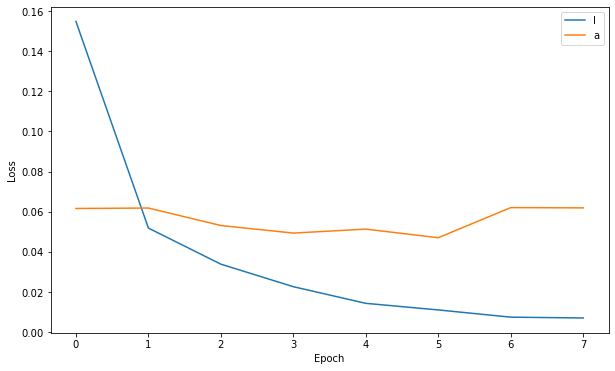

In [120]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)              # DataFrame' den cekilen loss degerleri
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');



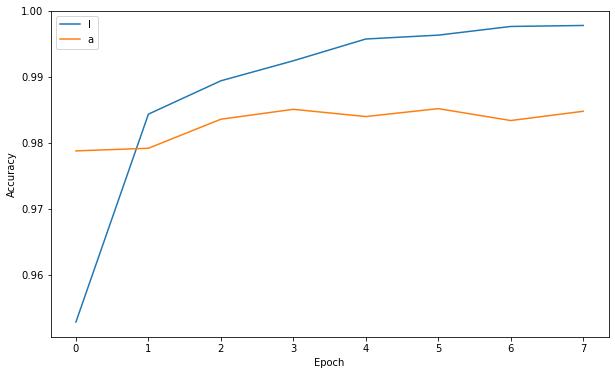

In [121]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        # DataFrame' den cekilen accuracy degerleri
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [124]:
print(model.evaluate(X_test,Y_test,verbose=1))

#burda da bir score aldik

313/313 [==============================] - 2s 6ms/step - loss: 0.0619 - accuracy: 0.9848
[0.061901722103357315, 0.9847999811172485]


In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [126]:
preds = model.predict(X_test)
preds

array([[1.8272137e-12, 6.1199504e-11, 4.7174179e-12, ..., 1.0000000e+00,
        1.4722037e-12, 6.8510406e-11],
       [1.3030729e-14, 4.4632914e-10, 1.0000000e+00, ..., 9.5628450e-22,
        1.0567742e-12, 1.9448715e-14],
       [3.2090461e-09, 9.9998748e-01, 2.1811671e-08, ..., 1.1836267e-05,
        5.2771288e-08, 1.2177569e-08],
       ...,
       [7.0868395e-17, 1.2225183e-14, 3.2557907e-15, ..., 4.6556758e-09,
        1.9582220e-08, 7.9313128e-10],
       [4.8352067e-15, 1.5994574e-17, 4.9594567e-21, ..., 1.1368118e-14,
        1.2972040e-09, 4.3853001e-19],
       [1.6943689e-13, 3.0532180e-14, 2.9668015e-11, ..., 5.7211703e-18,
        1.9609969e-10, 3.7154698e-20]], dtype=float32)

In [127]:
preds[0]

array([1.8272137e-12, 6.1199504e-11, 4.7174179e-12, 5.3392703e-11,
       4.1243221e-13, 1.7924065e-11, 4.9203487e-16, 1.0000000e+00,
       1.4722037e-12, 6.8510406e-11], dtype=float32)

In [128]:
predictions= np.argmax(preds, axis=1)

In [129]:
len(predictions)

10000

In [130]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

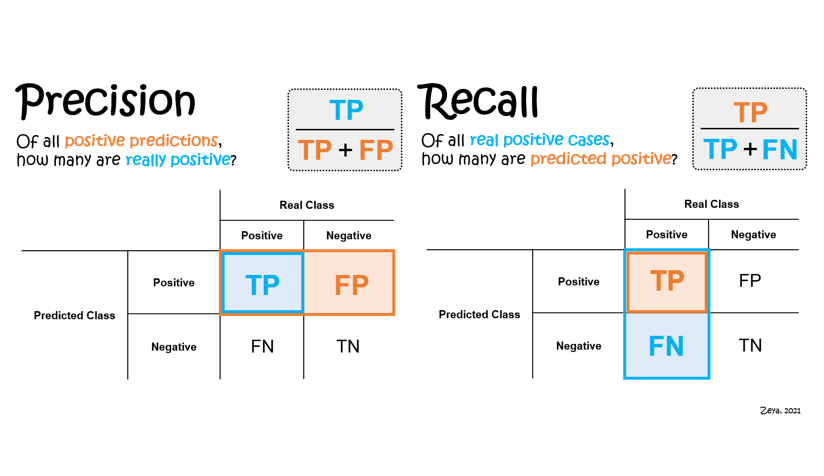

In [131]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [132]:
print(confusion_matrix(y_test, predictions))

#0dan 9 a kadar olan sayilar galiba

[[ 977    0    1    1    0    0    1    0    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [   4    2 1023    0    0    0    0    2    1    0]
 [   0    0    2  993    0    6    0    4    5    0]
 [   0    0    3    0  969    0    0    0    1    9]
 [   3    0    1    7    0  877    2    0    2    0]
 [   8    3    0    1    3    3  938    0    2    0]
 [   1    1   11    2    0    0    0 1008    1    4]
 [   6    0    2    2    4    2    0    3  951    4]
 [   5    2    0    3    7    3    0    7    2  980]]


In [133]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.061901722103357315
Test accuracy: 0.9847999811172485


In [134]:
my_number = X_test[5]

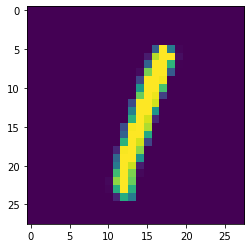

In [135]:
plt.imshow(my_number.reshape(28,28));     # 5. indexteki resmi görüntüle

In [136]:
model.predict(my_number.reshape(1,28,28,1))

array([[3.9484269e-10, 9.9996459e-01, 1.3141971e-09, 3.0001546e-12,
        3.0069778e-08, 9.9283992e-12, 1.2226360e-10, 3.5236953e-05,
        1.6750212e-08, 7.5626275e-08]], dtype=float32)

In [137]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1], dtype=int64)

In [138]:
model.save("cnn-1.h5")

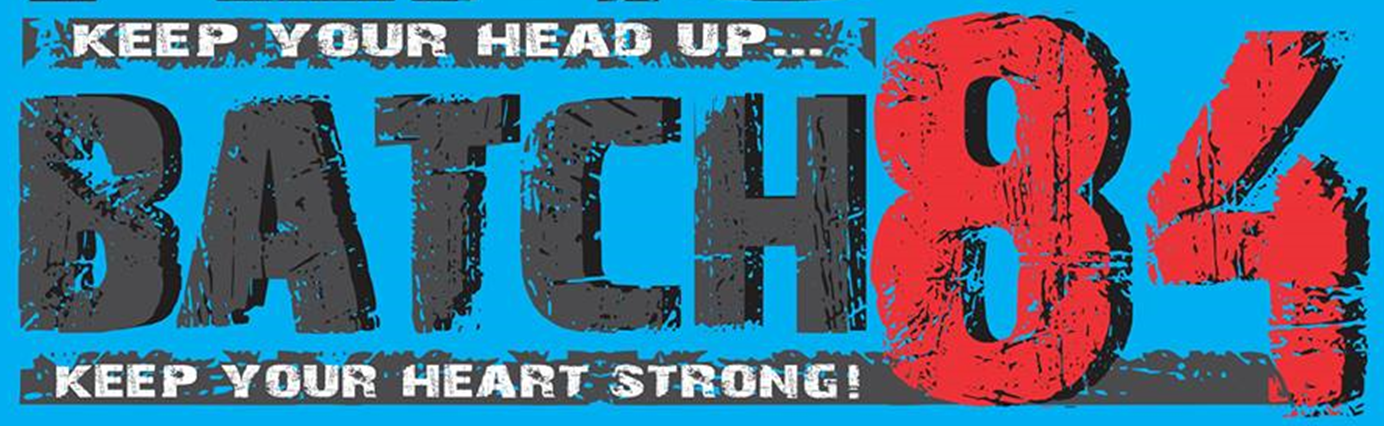

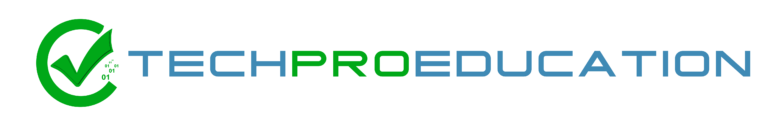